In [1]:
import pandas as pd                                     
import numpy as np                                   
import os                                               
import matplotlib.pyplot as plt                         
import scipy.stats.mstats as ssm                        
from scipy.stats import gaussian_kde as kde
import random

%matplotlib inline

Our first task is to transform the dataset into something meaningfully that we can use in our classifier. To do that we are going to aggregate the data based on the player and we are going to do that in the following way:
    1. Columns: playerShort, club, leagueCountry, birthday, height, weight and, position just get copied
    2. We drop column: player since the playerShort column is unique
    3. Columns: games, victories, ties, defeats, goals, yellowCards, yellowReds and, redCards get summed up
    4. We drop the photoID column
    5. Then we average the rating of the skin colour
    6. We then drop columns: refNum, refCountry and, Alpha_3
    7. We also drop nIAT, nExp, then average meanIAT, meanExp and calculate new seIAT, seExp based on the variance of the values we used in the averaging of meanIAT and meanExp.




In [2]:
df = pd.read_csv('CrowdstormingDataJuly1st.csv')

Let's check that the data was loaded 

In [3]:
df.head(5)

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


Ok now, let's make the playerShort the index, also let's average the skintone and drop all players that have the skintone as NaN. Plus, we average the player skintone.

In [4]:
#df.set_index(df.columns[0], inplace=True)
df.dropna(subset=['rater1', 'rater2'], inplace=True)
df['skintone']=df[['rater1', 'rater2']].mean(axis=1)
df.head(10)

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skintone
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0.375
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,0.750
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1.000
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.250
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.000
10,antonio-rukavina,Antonio Rukavina,Real Valladolid,Spain,26.01.1984,177.0,74.0,Right Fullback,2,2,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.000
11,ashkan-dejagah,Ashkan Dejagah,Fulham FC,England,05.07.1986,181.0,74.0,Left Winger,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.500
12,benedikt-hoewedes,Benedikt Höwedes,FC Schalke 04,Germany,29.02.1988,187.0,80.0,Center Back,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.000


The next step is to change the format of the data and keep only relevant fields.

In [5]:
df.drop(['player', 'rater1', 'rater2', 'photoID', 'birthday'], inplace=True, axis=1)
df.head()

,playerShort,club,leagueCountry,height,weight,position,games,victories,ties,defeats,...,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skintone
0,lucas-wilchez,Real Zaragoza,Spain,177.0,72.0,Attacking Midfielder,1,0,0,1,...,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,0.375
1,john-utaka,Montpellier HSC,France,179.0,82.0,Right Winger,1,0,0,1,...,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,0.750
5,aaron-hughes,Fulham FC,England,182.0,71.0,Center Back,1,0,0,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
6,aleksandar-kolarov,Manchester City,England,187.0,80.0,Left Fullback,1,1,0,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.125
7,alexander-tettey,Norwich City,England,180.0,68.0,Defensive Midfielder,1,0,0,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1.000


Now we will collapse these entries so that we have one row per player. We aggregate numerical values either by summing or averaging, and most frequent strings are selected (unless for 

In [6]:
players_grouped = df.groupby(by=['playerShort'])

fdict = dict.fromkeys(['club', 'leagueCountry'], lambda x: x.value_counts().index[0])
fdict.update({'position': lambda x: x.index[0]})
fdict.update(dict.fromkeys(['meanIAT', 'meanExp', 'seIAT', 'seExp', 'height', 'weight', 'skintone'], lambda x: np.mean(x)))
fdict.update(dict.fromkeys(['games', 'victories', 'ties', 'defeats', 'goals', 'yellowCards', 'yellowReds', 'redCards'], np.sum))

data = players_grouped.agg(fdict)
data.reset_index(inplace=True, drop=True)
labels = data[['skintone']]
data.drop('skintone', inplace=True, axis=1)
data.head()

,weight,games,seExp,victories,seIAT,defeats,meanExp,position,ties,yellowReds,yellowCards,height,redCards,goals,leagueCountry,club,meanIAT
0,71.0,654,0.004065,247,0.000652,228,0.494575,5,179,0,19,182.0,0,9,England,Fulham FC,0.346459
1,73.0,336,0.000993,141,0.000219,122,0.449220,745,73,0,42,183.0,1,62,Germany,Werder Bremen,0.348818
2,63.0,412,0.002032,200,0.000367,115,0.491482,746,97,0,11,165.0,0,31,England,Tottenham Hotspur,0.345893
3,76.0,260,0.013522,150,0.003334,68,0.514693,747,42,0,31,178.0,1,39,England,Arsenal FC,0.346821
4,73.0,124,0.005296,41,0.001488,43,0.335587,4418,40,4,8,180.0,2,1,France,Montpellier HSC,0.331600


Now we need to deal with the text features. Our model does not like text features so we have to encode them as numbers. There are two ways of doing this.
1. We relate each text value to a number
2. For each text value we add a new column and set it to 0 where that text value does not appear and 1 where it appers

In general it it suggested to use the second aproach, but in our case I will use the first aproach for 2 reasons: 
-There are a lot of clubs and that will add a lot of columns
-It will make it very dificult to inspect the feature_importances_

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le.fit(data['leagueCountry'])
le1.fit(data['club'])
le2.fit(data['position'].dropna())

LabelEncoder()

In [8]:
data['leagueCountry'] = le.transform(data['leagueCountry'])
data['club'] = le1.transform(data['club'])
data['position'] = data['position'].fillna(le2.inverse_transform(np.median(le2.transform(data['position'].dropna())).astype(int)))
data['position'] = le2.transform(data['position'])
data.head()

,weight,games,seExp,victories,seIAT,defeats,meanExp,position,ties,yellowReds,yellowCards,height,redCards,goals,leagueCountry,club,meanIAT
0,71.0,654,0.004065,247,0.000652,228,0.494575,2,179,0,19,182.0,0,9,0,34,0.346459
1,73.0,336,0.000993,141,0.000219,122,0.449220,407,73,0,42,183.0,1,62,2,91,0.348818
2,63.0,412,0.002032,200,0.000367,115,0.491482,408,97,0,11,165.0,0,31,0,83,0.345893
3,76.0,260,0.013522,150,0.003334,68,0.514693,409,42,0,31,178.0,1,39,0,6,0.346821
4,73.0,124,0.005296,41,0.001488,43,0.335587,1374,40,4,8,180.0,2,1,1,51,0.331600


Our model also does not like NaN values so we will fill them with the median of the respetive column

In [9]:
data['height'] = data['height'].fillna(np.median(data['height'].dropna()))
data['weight'] = data['weight'].fillna(np.median(data['weight'].dropna()))

In [10]:
#data.set_index(data.columns[0], inplace=True)

In [11]:
labels = labels.apply(lambda x: np.round(x))

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from sklearn import metrics
def checkCrossValidationAccuracy (data, labels):
    scores = []
    kf = KFold(len(labels), n_folds=20, shuffle=True, random_state=123)
    for train_index, test_index in kf:
        clf = RandomForestClassifier(n_estimators=15)
        X_train, X_test = data.loc[train_index], data.loc[test_index]
        y_train, y_test = labels.loc[train_index], labels.loc[test_index]
        clf.fit(X_train, y_train['skintone'])
        scores.append(metrics.accuracy_score(y_test['skintone'], clf.predict(X_test)))
        #print(metrics.accuracy_score(y_test['skintone'], clf.predict(X_test)))
        #print(metrics.accuracy_score(y_train['skintone'], clf.predict(X_train)))
    return np.average(scores) 
checkCrossValidationAccuracy(data,labels)

0.84541139240506324

Okay now let's try dropping some cols. Let's drop the club and the leagueCountry as those atributs should not affect the player

In [13]:
data1 = data.drop("leagueCountry", 1)
data1 = data1.drop("club", 1)

In [14]:
checkCrossValidationAccuracy(data1,labels)

0.85112341772151878

It looks like droping thoose features did not increase the accuracy but at the same time it simplified the model

In [15]:
data2 = data1.drop("games", 1)
data2 = data2.drop("victories", 1)
data2 = data2.drop("ties", 1)
data2 = data2.drop("defeats", 1)

In [16]:
data2.head()

,weight,seExp,seIAT,meanExp,position,yellowReds,yellowCards,height,redCards,goals,meanIAT
0,71.0,0.004065,0.000652,0.494575,2,0,19,182.0,0,9,0.346459
1,73.0,0.000993,0.000219,0.449220,407,0,42,183.0,1,62,0.348818
2,63.0,0.002032,0.000367,0.491482,408,0,11,165.0,0,31,0.345893
3,76.0,0.013522,0.003334,0.514693,409,0,31,178.0,1,39,0.346821
4,73.0,0.005296,0.001488,0.335587,1374,4,8,180.0,2,1,0.331600


In [17]:
checkCrossValidationAccuracy(data2,labels)

0.84857594936708858

In [18]:
clf = RandomForestClassifier(n_estimators=15)
clf.fit(data2, labels['skintone'])
clf.feature_importances_

array([ 0.07310415,  0.15054903,  0.13471829,  0.1289907 ,  0.11083513,
        0.02324761,  0.08460606,  0.05209199,  0.02959439,  0.07298567,
        0.13927698])

Let's try to join the yellowReds and redCards columns

In [19]:
data3 = data2
data3['redCards'] = data3['redCards'] + data3['yellowReds']
data3 = data3.drop("yellowReds", 1)

In [20]:
checkCrossValidationAccuracy(data3,labels)

0.84416139240506338

In [21]:
clf = RandomForestClassifier(n_estimators=15)
clf.fit(data3, labels['skintone'])
clf.feature_importances_

array([ 0.06561853,  0.14015927,  0.13207687,  0.13206748,  0.11798255,
        0.08616385,  0.06645435,  0.04544322,  0.07511769,  0.13891618])

Let's also try to remove the position 

In [22]:
data4 = data3.drop("position", 1)

In [23]:
checkCrossValidationAccuracy(data4,labels)

0.8409731012658227

We can also try to join the yellow cards and red cards in one column named cards

In [24]:
data5 = data4
data5['cards'] = data5['redCards'] + data5['yellowCards']
data5 = data5.drop('redCards', 1)
data5 = data5.drop('yellowCards', 1)
data5.head()

,weight,seExp,seIAT,meanExp,height,goals,meanIAT,cards
0,71.0,0.004065,0.000652,0.494575,182.0,9,0.346459,19
1,73.0,0.000993,0.000219,0.449220,183.0,62,0.348818,43
2,63.0,0.002032,0.000367,0.491482,165.0,31,0.345893,11
3,76.0,0.013522,0.003334,0.514693,178.0,39,0.346821,32
4,73.0,0.005296,0.001488,0.335587,180.0,1,0.331600,14


In [25]:
checkCrossValidationAccuracy(data5,labels)

0.84479430379746834

In [26]:
clf = RandomForestClassifier(n_estimators=15)
clf.fit(data5, labels['skintone'])
clf.feature_importances_

array([ 0.07606556,  0.19423539,  0.14860069,  0.15051175,  0.08308475,
        0.09331962,  0.15881737,  0.09536488])

The final simplification that we can try is to eleminate all data that is not connected to the cards

In [27]:
data6 = data5.drop('height', 1)
data6 = data6.drop("weight", 1)

In [28]:
checkCrossValidationAccuracy(data6,labels) 

0.84288765822784817

In [29]:
clf = RandomForestClassifier(n_estimators=15)
clf.fit(data6, labels['skintone'])
clf.feature_importances_

array([ 0.18082336,  0.20892504,  0.17679422,  0.11630802,  0.18517761,
        0.13197175])

## PART 2

In [30]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

We recuperate the aggregated dataframe we computed earlier

In [31]:
part2df = players_grouped.agg(fdict)
part2df.reset_index(inplace=True, drop=True)
part2df.head()

,weight,games,skintone,seExp,victories,seIAT,defeats,meanExp,position,ties,yellowReds,yellowCards,height,redCards,goals,leagueCountry,club,meanIAT
0,71.0,654,0.125,0.004065,247,0.000652,228,0.494575,5,179,0,19,182.0,0,9,England,Fulham FC,0.346459
1,73.0,336,0.125,0.000993,141,0.000219,122,0.449220,745,73,0,42,183.0,1,62,Germany,Werder Bremen,0.348818
2,63.0,412,0.250,0.002032,200,0.000367,115,0.491482,746,97,0,11,165.0,0,31,England,Tottenham Hotspur,0.345893
3,76.0,260,0.000,0.013522,150,0.003334,68,0.514693,747,42,0,31,178.0,1,39,England,Arsenal FC,0.346821
4,73.0,124,0.250,0.005296,41,0.001488,43,0.335587,4418,40,4,8,180.0,2,1,France,Montpellier HSC,0.331600


We only want the numeric data

In [32]:
part2df = part2df._get_numeric_data()

In [33]:
part2df.head()

,weight,games,skintone,seExp,victories,seIAT,defeats,meanExp,position,ties,yellowReds,yellowCards,height,redCards,goals,meanIAT
0,71.0,654,0.125,0.004065,247,0.000652,228,0.494575,5,179,0,19,182.0,0,9,0.346459
1,73.0,336,0.125,0.000993,141,0.000219,122,0.449220,745,73,0,42,183.0,1,62,0.348818
2,63.0,412,0.250,0.002032,200,0.000367,115,0.491482,746,97,0,11,165.0,0,31,0.345893
3,76.0,260,0.000,0.013522,150,0.003334,68,0.514693,747,42,0,31,178.0,1,39,0.346821
4,73.0,124,0.250,0.005296,41,0.001488,43,0.335587,4418,40,4,8,180.0,2,1,0.331600


We transform skintone into discrete values 0 and 1

In [52]:
part2df['skintone'] = part2df['skintone'].apply(lambda x: 1 if x>=0.5 else 0)
part2df.head()

,weight,games,skintone,seExp,victories,seIAT,defeats,meanExp,position,ties,yellowReds,yellowCards,height,redCards,goals,meanIAT
0,71.0,654,0,0.004065,247,0.000652,228,0.494575,5,179,0,19,182.0,0,9,0.346459
1,73.0,336,0,0.000993,141,0.000219,122,0.449220,745,73,0,42,183.0,1,62,0.348818
2,63.0,412,0,0.002032,200,0.000367,115,0.491482,746,97,0,11,165.0,0,31,0.345893
3,76.0,260,0,0.013522,150,0.003334,68,0.514693,747,42,0,31,178.0,1,39,0.346821
4,73.0,124,0,0.005296,41,0.001488,43,0.335587,4418,40,4,8,180.0,2,1,0.331600


We then drop rows that contain at least one NaN, because KMeans can't work with that

In [53]:
part2df.dropna(inplace=True)

In [54]:
#df_train, df_test = sklearn.cross_validation.train_test_split(part2df, train_size=0.6)

kmean = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1)
kmean.fit(part2df)
labels = kmean.labels_
kmean.cluster_centers_.shape

(2, 16)

We'll now use "principal component analysis" to plot the output, PCA tries to merge the columns to be able to print them in 2D while keeping the structure of the multidimensional clusters

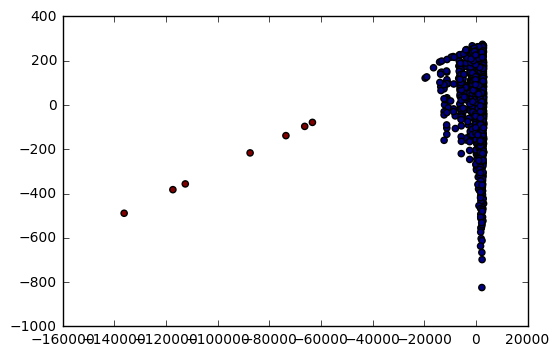

In [55]:
from sklearn.decomposition import PCA

# Create a PCA model.
pca_2 = PCA(2)
# Fit the PCA model on the numeric columns from earlier.
plot_columns = pca_2.fit_transform(part2df)
# Make a scatter plot of each game, shaded according to cluster assignment.
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
# Show the plot.
plt.show()

In [56]:
sklearn.metrics.silhouette_score(part2df, labels, metric='euclidean')

0.9687658698667968

In [57]:
part2df.corr()['skintone']

weight        -0.036385
games         -0.079224
skintone       1.000000
seExp          0.241993
victories     -0.072350
seIAT          0.231063
defeats       -0.092573
meanExp       -0.154169
position       0.038592
ties          -0.054363
yellowReds    -0.032953
yellowCards   -0.094580
height        -0.045684
redCards       0.007436
goals         -0.001095
meanIAT       -0.209166
Name: skintone, dtype: float64

In [58]:
avgSkintone = part2df.groupby(labels).mean()['skintone'].values
avgSkintone

array([ 0.23956326,  0.71428571])

We will now remove one column at a time and print the result.
First we will put skintone in first position since we don't want to drop it

In [81]:
cols = part2df.columns.tolist()
cols[0], cols[2] = cols[2], cols[0]
shortenedDF = part2df[cols]
shortenedDF.head()

,skintone,games,weight,seExp,victories,seIAT,defeats,meanExp,position,ties,yellowReds,yellowCards,height,redCards,goals,meanIAT
0,0,654,71.0,0.004065,247,0.000652,228,0.494575,5,179,0,19,182.0,0,9,0.346459
1,0,336,73.0,0.000993,141,0.000219,122,0.449220,745,73,0,42,183.0,1,62,0.348818
2,0,412,63.0,0.002032,200,0.000367,115,0.491482,746,97,0,11,165.0,0,31,0.345893
3,0,260,76.0,0.013522,150,0.003334,68,0.514693,747,42,0,31,178.0,1,39,0.346821
4,0,124,73.0,0.005296,41,0.001488,43,0.335587,4418,40,4,8,180.0,2,1,0.331600


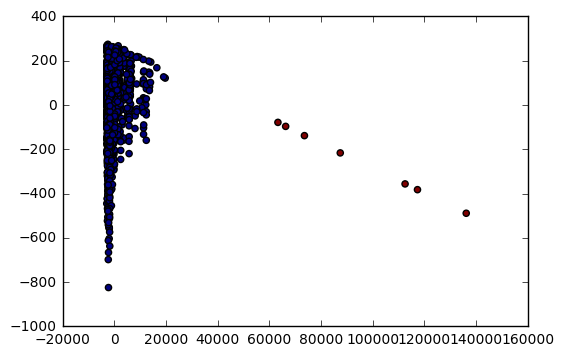

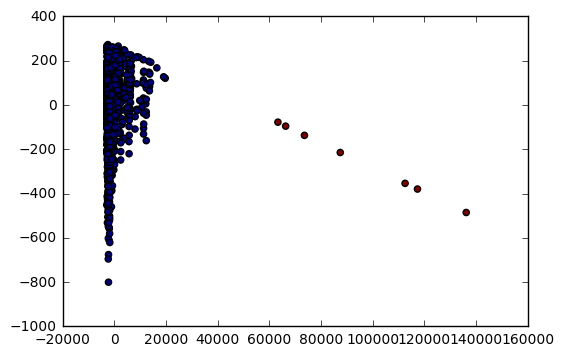

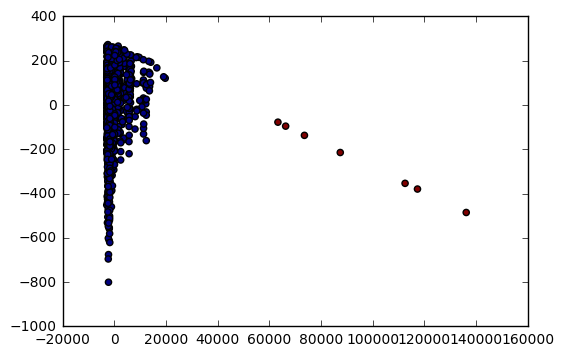

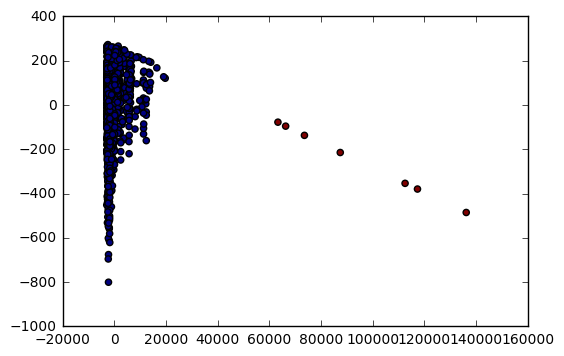

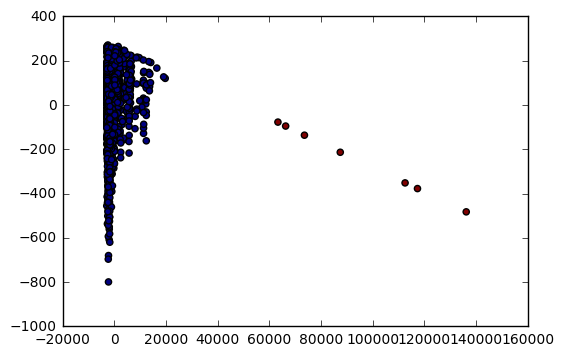

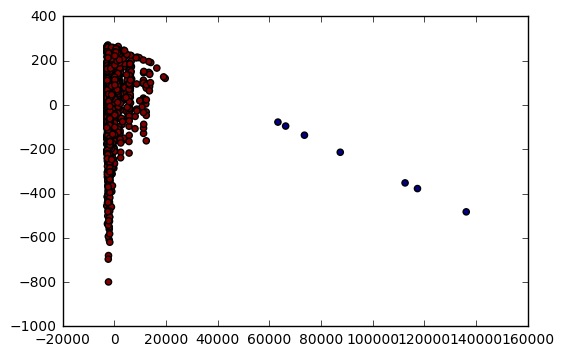

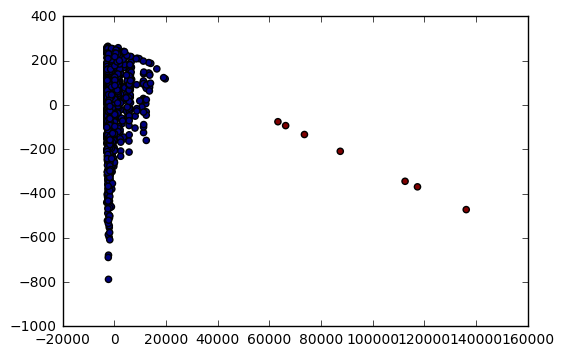

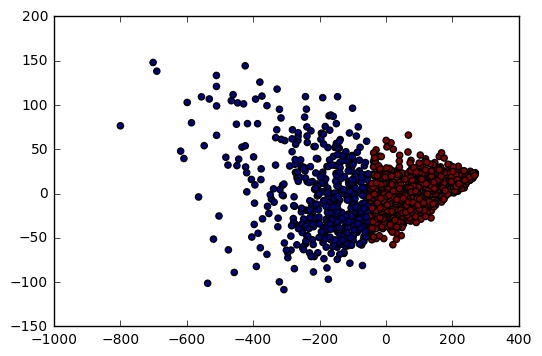

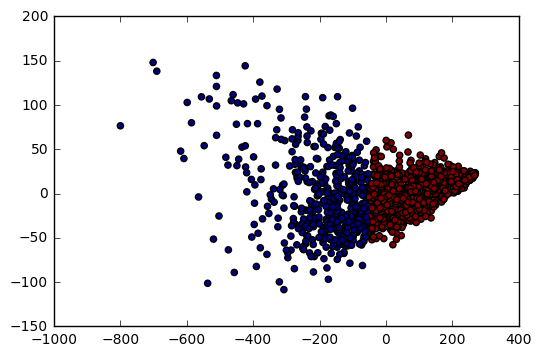

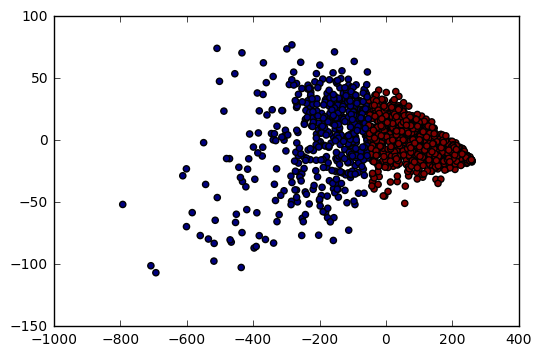

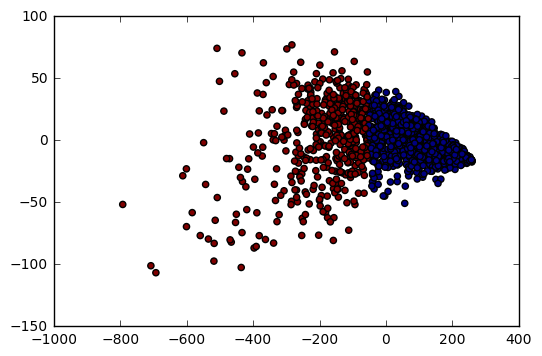

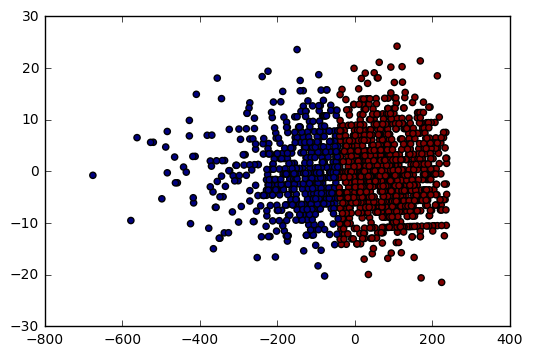

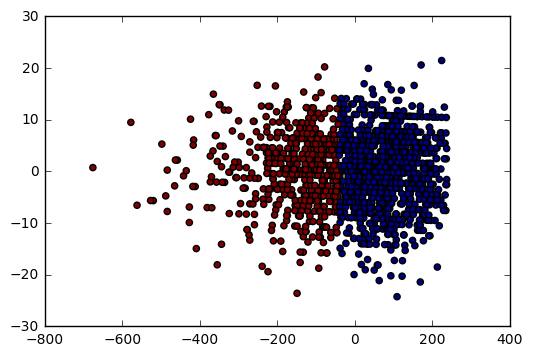

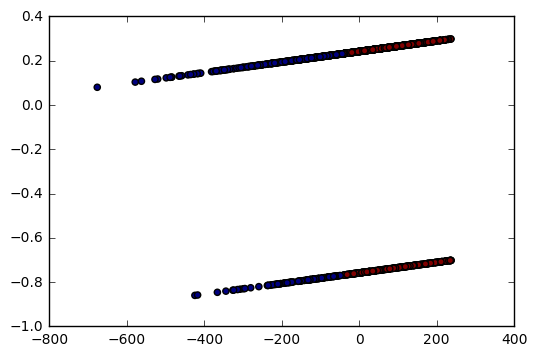

ValueError: n_components=2 invalid for n_features=1

In [82]:
silhouette_scores = []
avg_skintones = []
#the code down below is just reused code already explained earlier. The only difference is that we store the outputs in tables to compare them later
for i in range (part2df.shape[1]-1,  0, -1):
    shortenedDF = shortenedDF.drop(shortenedDF.columns[i], axis=1)
    kmean.fit(shortenedDF)
    labels = kmean.labels_
    silhouette_scores.append(sklearn.metrics.silhouette_score(shortenedDF, labels, metric='euclidean'))
    avg_skintones.append(shortenedDF.groupby(labels).mean()['skintone'].values)
    plot_columns = pca_2.fit_transform(shortenedDF)
    plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
    plt.show()

In [77]:
silhouette_scores

[0.96876586986876057,
 0.96878752528188583,
 0.9687875516052713,
 0.96878819631456625,
 0.96879574530816137,
 0.96879577315788279,
 0.96880709613690141,
 0.57614801327085119,
 0.57614848216119618,
 0.58861361658483902,
 0.5886136166370306,
 0.59750612660904612,
 0.59750612955040394,
 0.60238268799515637,
 1.0]

In [83]:
avg_skintones

[array([ 0.23956326,  0.71428571]),
 array([ 0.23956326,  0.71428571]),
 array([ 0.23956326,  0.71428571]),
 array([ 0.23956326,  0.71428571]),
 array([ 0.23956326,  0.71428571]),
 array([ 0.71428571,  0.23956326]),
 array([ 0.23956326,  0.71428571]),
 array([ 0.2188755 ,  0.25234522]),
 array([ 0.2188755 ,  0.25234522]),
 array([ 0.21995927,  0.25163094]),
 array([ 0.25163094,  0.21995927]),
 array([ 0.21289062,  0.25570342]),
 array([ 0.25570342,  0.21289062]),
 array([ 0.21289062,  0.25570342]),
 array([1, 0], dtype=int64)]